# Topic 1: Price Forecast - Avocado

### Business Objective/Problem

Bơ “Hass”, một công ty có trụ sở tại Mexico, chuyên sản xuất nhiều loại quả bơ được bán ở Mỹ. Họ đã rất thành công trong những năm  gần đây và muốn mở rộng. Vì vậy, họ muốn xây dựng mô hình hợp lý để dự đoán giá trung bình của bơ “Hass” ở Mỹ nhằm xem xét việc mở rộng các loại trang trại Bơ đang có cho việc trồng bơ ở các vùng khác. 

## Triển Khai Dự Án

### Bước 1: Business Understanding 

Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu hỏi cụ thể cho doanh nghiệp và các đối tượng có liên quan) => xác định được vấn đề: 
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của  nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),và có 3 PLU (Product Look Up) khác nhau (4046, 4225,4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng. 
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh.

### Bước 2: Data Understanding/ Acquire 

Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:

- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ (National retail volume- units) và giá bơ từ tháng 4/2015 đến tháng 3/2018. 
- Giá Trung bình (Average Price) trong bảng phản ánh giá trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) được bán trong bao. 
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm khác.

#### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột: 
- Date - ngày ghi nhận
- AveragePrice – giá trung bình của một quả bơ
- Type - conventional / organic – loại: thông thường/ hữu cơ
- Region – vùng được bán
- Total Volume – tổng số bơ đã bán
- 4046 – tổng số bơ có mã PLU 4046 đã bán
- 4225 - tổng số bơ có mã PLU 4225 đã bán
- 4770 - tổng số bơ có mã PLU 4770 đã bán
- Total Bags – tổng số túi đã bán
- Small/Large/XLarge Bags – tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép chúng ta thực hiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ. 

<b>=> Có thể tập trung giải quyết hai bài toán</b>:
- <b>Bài toán 1</b>: USA’s Avocado AveragePrice Prediction – Sử dụng các thuật toán Regression như Linear Regression, Random Forest, XGB Regressor...
- <b>Bài toán 2</b>: Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet...

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

from lazypredict.Supervised import LazyClassifier

Importing plotly failed. Interactive plots will not work.
c:\users\duyqu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv('avocado.csv', index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
data.head()

Date  AveragePrice  Total Volume    4046      4225   4770  \
0  2015-12-27          1.33      64236.62 1036.74  54454.85  48.16   
1  2015-12-20          1.35      54876.98  674.28  44638.81  58.33   
2  2015-12-13          0.93     118220.22  794.70 109149.67 130.50   
3  2015-12-06          1.08      78992.15 1132.00  71976.41  72.58   
4  2015-11-29          1.28      51039.60  941.48  43838.39  75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25         0.00  conventional  2015  Albany  
1     9505.56     9408.07       97.49         0.00  conventional  2015  Albany  
2     8145.35     8042.21      103.14         0.00  conventional  2015  Albany  
3     5811.16     5677.40      133.76         0.00  conventional  2015  Albany  
4     6183.95     5986.26      197.69         0.00  conventional  2015  Albany

# Yêu cầu 1: Bài Toán Dự Đoán Giá Avocado trên toàn nước Mỹ


### Bước 3: Data Preparation / Prepare

#### First EDA => Check data

In [6]:
df = data.copy()

In [7]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<b> Theo Pandas Profiling, ta có những thông tin ban đầu về tập dữ liệu: </b>
- Không có dữ liệu bị thiếu giá trị
- Không có dữ liệu trùng
- Các giá trị zero trong dữ liệu là có ý nghĩa, thể hiện số lượng bán = 0
- Có hiện tượng đa cộng tuyến giữa Total Volume với các biến liên tục khác
- theo pandas profilling thì type, region, year là các biến Categorical, tuy nhiên biến year ở đây ta sẽ xem là biến continuous

### Phân tích các biến Categorical

In [8]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [9]:
table = pd.crosstab(df['type'],df['region'])
table

region        Albany  Atlanta  BaltimoreWashington  Boise  Boston  \
type                                                                
conventional     169      169                  169    169     169   
organic          169      169                  169    169     169   

region        BuffaloRochester  California  Charlotte  Chicago  \
type                                                             
conventional               169         169        169      169   
organic                    169         169        169      169   

region        CincinnatiDayton  ...  SouthCarolina  SouthCentral  Southeast  \
type                            ...                                           
conventional               169  ...            169           169        169   
organic                    169  ...            169           169        169   

region        Spokane  StLouis  Syracuse  Tampa  TotalUS  West  \
type                                                             
conventional      169      169       169    169      169   169   
organic           169      169       169    169      169   169   

region        WestTexNewMexico  
type                            
conventional               169  
organic                    166  

[2 rows x 54 columns]

In [10]:
# Categorical & Categorical
# H1: type và region phụ thuộc
# H0: type và region độc lập
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
alpha = 1 - prob
print('significance =', alpha, ' p=',p)
if p < alpha:
    print('Bác bỏ H0 => type & region phụ thuộc')
else:
    print('Không bác bỏ H0 => type & region độc lập')

significance = 0.050000000000000044  p= 1.0
Không bác bỏ H0 => type & region độc lập


#### type / region có ảnh hưởng đến AveragePrice không

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
# kiểm định bằng ANOVA cho 2 biến AveragePrice ~ C(type)
model = ols('AveragePrice ~ C(type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df        F  PR(>F)
C(type)  1122.20     1.00 11148.79    0.00
Residual 1836.68 18247.00      nan     nan

P-value thu được từ phân tích ANOVA cho AveragePrice và type phối hợp có ý nghĩa thống kê (P < 0.05).

<b>Kết luận: type có ảnh hưởng đến AveragePrice</b>

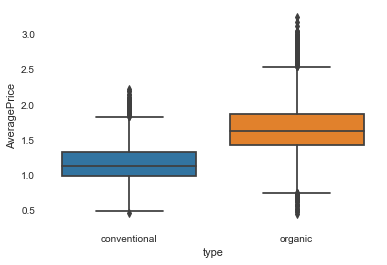

In [13]:
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.show()

- organic có giá trung bình cao hơn conventional
- AveragePrice có bị ảnh hưởng bởi type

In [14]:
# kiểm định bằng ANOVA cho 2 biến AveragePrice ~ C(region)
model = ols('AveragePrice ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df     F  PR(>F)
C(region)  497.47    53.00 69.38    0.00
Residual  2461.41 18195.00   nan     nan

P-value thu được từ phân tích ANOVA cho AveragePrice và region phối hợp có ý nghĩa thống kê (P < 0.05).

<b>Kết luận: region có ảnh hưởng đến AveragePrice</b>

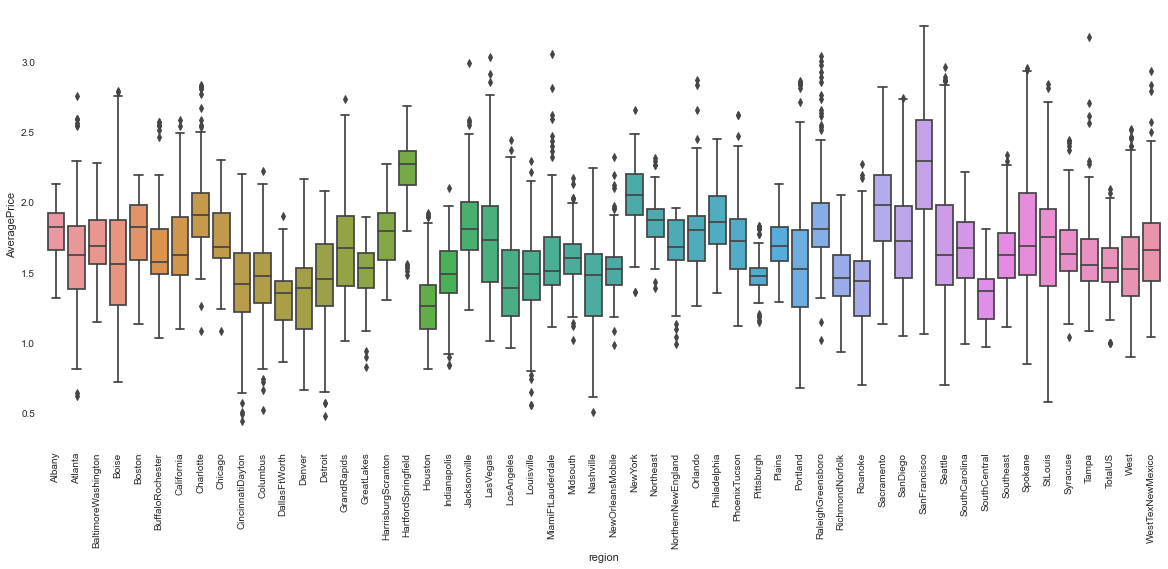

In [15]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df[df['type']=='organic'], x='region', y='AveragePrice')
plt.xticks(rotation=90)
plt.show()

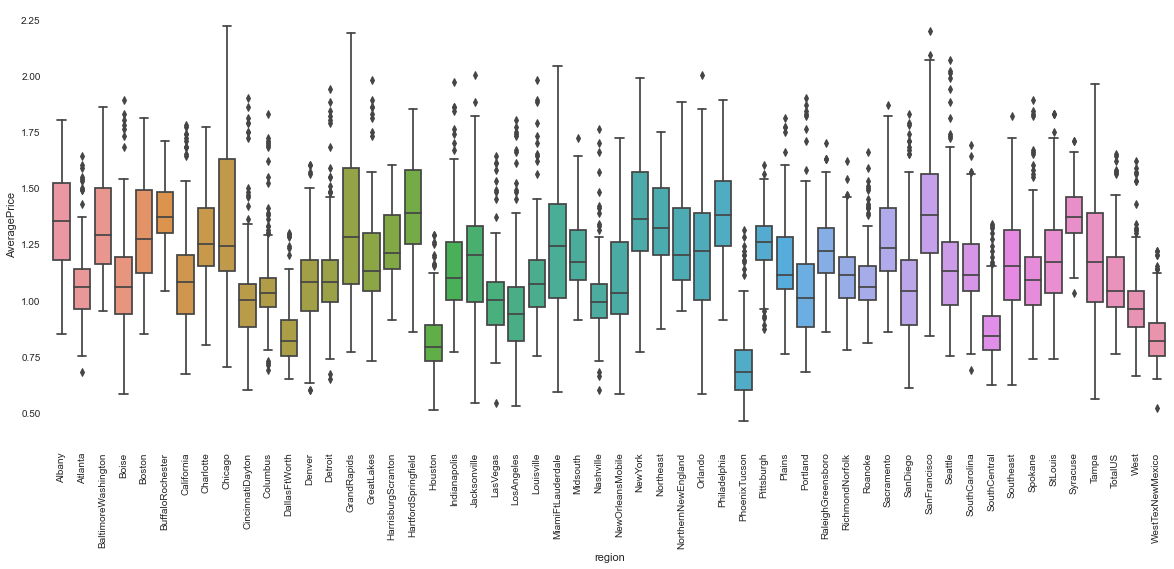

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df[df['type']=='conventional'], x='region', y='AveragePrice')
plt.xticks(rotation=90)
plt.show()

trung bình AveragePrice có sự thay đổi ở các khu vực khác nhau, ngay cả khi xem xét riêng cho từng loại organic và conventional

#### <span style="color:blue"> Kết luận: sử dụng biến type và region trong mô hình dự đoán giá trị của AveragePrice</span>

### Phân tích các biến continuous

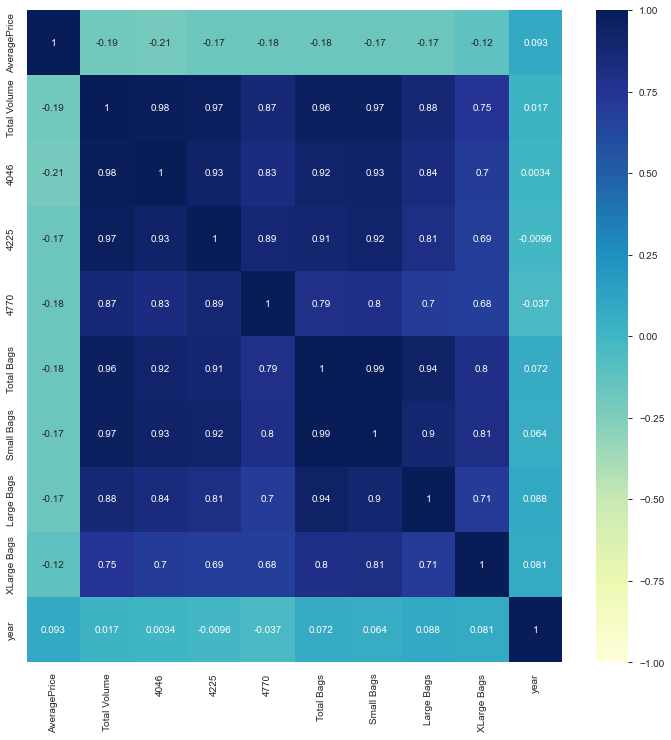

In [17]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.show()

- các biến continuous không có quan hệ tuyến tính với AveragePrice => mô hình dự đoán tuyến tính sẽ không phù hợp
- Total Volume đa cộng tuyến với 4046, 4225, 4770 => chỉ cần chọn Total Volume vào mô hình dự đoán, bỏ 3 biến gây đa cộng tuyến
- Total Bags đa cộng tuyến với Small Bags, Large Bags, XLarge Bags => chỉ cần chọn Total Bags vào mô hình dự đoán, bỏ 3 biến gây đa cộng tuyến
- Total Volume đa cộng tuyến với Total Bags, ta sẽ xem xét việc có cả 2 hoặc loại Total Bags ảnh hưởng như thế nào trong mô hình regression sau

#### <span style="color:blue"> Kết luận: các biến continuous chỉ giữ lại Total Volume, Total Bags, year đưa vào mô hình dự đoán (ta sẽ xem xét việc có cả 2 hoặc loại Total Bags ảnh hưởng như thế nào trong mô hình regression sau)</span> 

### kiểm tra outliers Total Volume

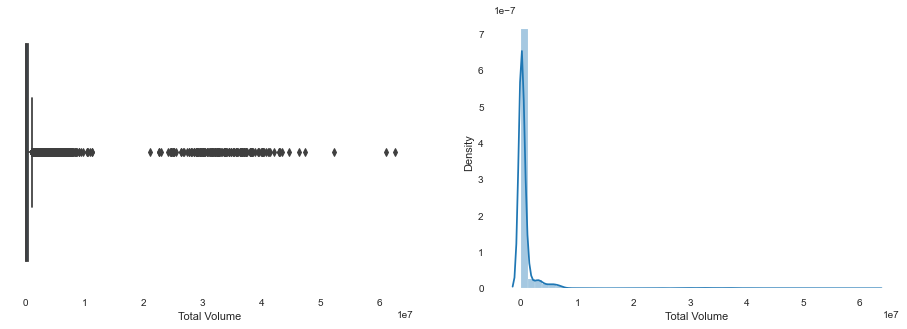

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['Total Volume'])
plt.subplot(1,2,2)
sns.distplot(df['Total Volume'])
plt.show()

<b>có outlier, dữ liệu hơn 18.000 record có thể xấp xỉ phân phối chuẩn, dùng z-score để check</b>

In [53]:
upper = df['Total Volume'].mean() + 3*df['Total Volume'].std()
lower = df['Total Volume'].mean() - 3*df['Total Volume'].std()

df[(df['Total Volume'] > upper) | (df['Total Volume'] < lower)]['region'].unique()

array(['TotalUS', 'California', 'West'], dtype=object)

In [58]:
#kiểm tra tiếp total volume của 3 region này
df[df['region'] == 'TotalUS']['Total Volume'].describe()

count        338.00
mean    17351302.31
std     16968469.17
min       501814.87
25%       969733.49
50%     11412330.09
75%     32949824.15
max     62505646.52
Name: Total Volume, dtype: float64

In [59]:
df[df['region'] == 'California']['Total Volume'].describe()

count        338.00
mean     3044324.42
std      3012443.21
min        70004.38
25%       140344.51
50%      1698251.31
75%      5871188.64
max     11213596.29
Name: Total Volume, dtype: float64

In [60]:
df[df['region'] == 'West']['Total Volume'].describe()

count        338.00
mean     3215322.95
std      3113643.25
min        96943.41
25%       204424.67
50%      2174024.53
75%      6171513.45
max     11274749.11
Name: Total Volume, dtype: float64

#### cả 3 region trên đều có 338 record với các khoảng dữ liệu 0-25-50-75-100 đều có nghĩa, kết hợp với việc dữ liệu được trích xuất từ máy bán hàng nên ta có thể coi việc "nhập liệu sai" là ít có khả năng xảy ra => chấp nhận outliers và dùng standardscaler để scale dữ liệu

### Feature Engineering

có thể xem xét yếu tố mùa xuân hạ thu đông có ảnh hưởng đến AveragePrice
- mùa xuân: tháng 3,4,5
- mùa hạ: tháng 6,7,8
- mùa thu: tháng 9,10,11
- mùa đông: tháng 12,1,2

In [18]:
#chuyển dữ liệu biến Date về kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
#tạo ra cột Month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

Date  AveragePrice  Total Volume    4046      4225   4770  Total Bags  \
0 2015-12-27          1.33      64236.62 1036.74  54454.85  48.16     8696.87   
1 2015-12-20          1.35      54876.98  674.28  44638.81  58.33     9505.56   
2 2015-12-13          0.93     118220.22  794.70 109149.67 130.50     8145.35   
3 2015-12-06          1.08      78992.15 1132.00  71976.41  72.58     5811.16   
4 2015-11-29          1.28      51039.60  941.48  43838.39  75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  
0     8603.62       93.25         0.00  conventional  2015  Albany     12  
1     9408.07       97.49         0.00  conventional  2015  Albany     12  
2     8042.21      103.14         0.00  conventional  2015  Albany     12  
3     5677.40      133.76         0.00  conventional  2015  Albany     12  
4     5986.26      197.69         0.00  conventional  2015  Albany     11

In [20]:
def to_season(month):
    if month >= 3 and month <= 5:
        return 0
    elif month >= 6 and month <= 8:
        return 1
    elif month >= 9 and month <= 11:
        return 2
    else:
        return 3

In [21]:
#tạo ra cột Season
df['Season'] = df['Month'].apply(lambda x: to_season(x))

In [22]:
df.head()

Date  AveragePrice  Total Volume    4046      4225   4770  Total Bags  \
0 2015-12-27          1.33      64236.62 1036.74  54454.85  48.16     8696.87   
1 2015-12-20          1.35      54876.98  674.28  44638.81  58.33     9505.56   
2 2015-12-13          0.93     118220.22  794.70 109149.67 130.50     8145.35   
3 2015-12-06          1.08      78992.15 1132.00  71976.41  72.58     5811.16   
4 2015-11-29          1.28      51039.60  941.48  43838.39  75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  \
0     8603.62       93.25         0.00  conventional  2015  Albany     12   
1     9408.07       97.49         0.00  conventional  2015  Albany     12   
2     8042.21      103.14         0.00  conventional  2015  Albany     12   
3     5677.40      133.76         0.00  conventional  2015  Albany     12   
4     5986.26      197.69         0.00  conventional  2015  Albany     11   

   Season  
0       3  
1       3  
2       3  
3       3  
4       2

In [23]:
# kiểm định bằng ANOVA cho 2 biến AveragePrice ~ C(Season)
model = ols('AveragePrice ~ C(Season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df      F  PR(>F)
C(Season)  152.81     3.00 331.19    0.00
Residual  2806.07 18245.00    nan     nan

P-value thu được từ phân tích ANOVA cho AveragePrice và Season phối hợp có ý nghĩa thống kê (P < 0.05).

<b>Kết luận: Season có ảnh hưởng đến AveragePrice</b>

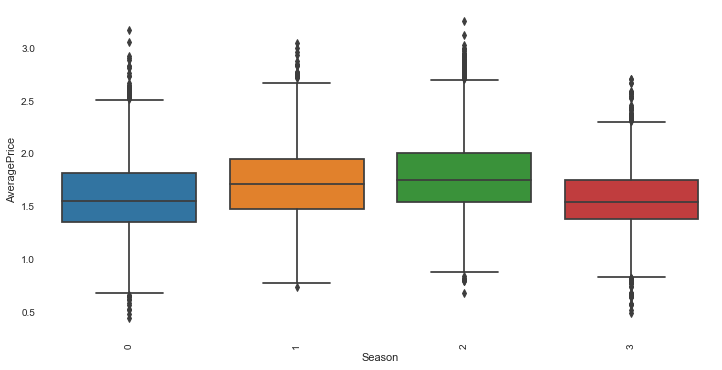

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['type']=='organic'], x='Season', y='AveragePrice')
plt.xticks(rotation=90)
plt.show()

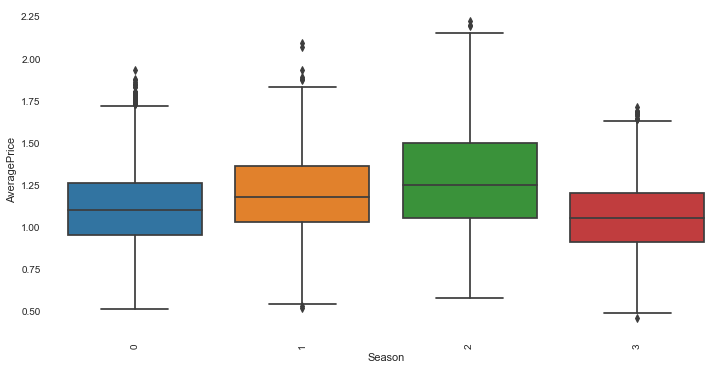

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['type']=='conventional'], x='Season', y='AveragePrice')
plt.xticks(rotation=90)
plt.show()

trung bình AveragePrice có sự khác nhau ở các Season trên cả 2 loại organic và conventional

#### <span style="color:blue"> Kết luận: sử dụng biến Season trong mô hình dự đoán giá trị của AveragePrice</span>

In [39]:
df.describe()

AveragePrice  Total Volume        4046        4225       4770  \
count      18249.00      18249.00    18249.00    18249.00   18249.00   
mean           1.41     850644.01   293008.42   295154.57   22839.74   
std            0.40    3453545.36  1264989.08  1204120.40  107464.07   
min            0.44         84.56        0.00        0.00       0.00   
25%            1.10      10838.58      854.07     3008.78       0.00   
50%            1.37     107376.76     8645.30    29061.02     184.99   
75%            1.66     432962.29   111020.20   150206.86    6243.42   
max            3.25   62505646.52 22743616.17 20470572.61 2546439.11   

       Total Bags  Small Bags  Large Bags  XLarge Bags     year    Month  \
count    18249.00    18249.00    18249.00     18249.00 18249.00 18249.00   
mean    239639.20   182194.69    54338.09      3106.43  2016.15     6.18   
std     986242.40   746178.51   243965.96     17692.89     0.94     3.53   
min          0.00        0.00        0.00         0.00  2015.00     1.00   
25%       5088.64     2849.42      127.47         0.00  2015.00     3.00   
50%      39743.83    26362.82     2647.71         0.00  2016.00     6.00   
75%     110783.37    83337.67    22029.25       132.50  2017.00     9.00   
max   19373134.37 13384586.80  5719096.61    551693.65  2018.00    12.00   

        Season  type_new  
count 18249.00  18249.00  
mean      1.53      0.50  
std       1.15      0.50  
min       0.00      0.00  
25%       0.00      0.00  
50%       2.00      0.00  
75%       3.00      1.00  
max       3.00      1.00

In [31]:
#label encoder cho biến type
le = LabelEncoder()
df['type_new'] = le.fit_transform(df['type'])

In [32]:
df.head()

Date  AveragePrice  Total Volume    4046      4225   4770  Total Bags  \
0 2015-12-27          1.33      64236.62 1036.74  54454.85  48.16     8696.87   
1 2015-12-20          1.35      54876.98  674.28  44638.81  58.33     9505.56   
2 2015-12-13          0.93     118220.22  794.70 109149.67 130.50     8145.35   
3 2015-12-06          1.08      78992.15 1132.00  71976.41  72.58     5811.16   
4 2015-11-29          1.28      51039.60  941.48  43838.39  75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  \
0     8603.62       93.25         0.00  conventional  2015  Albany     12   
1     9408.07       97.49         0.00  conventional  2015  Albany     12   
2     8042.21      103.14         0.00  conventional  2015  Albany     12   
3     5677.40      133.76         0.00  conventional  2015  Albany     12   
4     5986.26      197.69         0.00  conventional  2015  Albany     11   

   Season  type_new  
0       3         0  
1       3         0  
2       3         0  
3       3         0  
4       2         0

In [33]:
#onehot encoder cho biến region
df_ohe = pd.get_dummies(data=df, columns=['region'])
df_ohe.head()

Date  AveragePrice  Total Volume    4046      4225   4770  Total Bags  \
0 2015-12-27          1.33      64236.62 1036.74  54454.85  48.16     8696.87   
1 2015-12-20          1.35      54876.98  674.28  44638.81  58.33     9505.56   
2 2015-12-13          0.93     118220.22  794.70 109149.67 130.50     8145.35   
3 2015-12-06          1.08      78992.15 1132.00  71976.41  72.58     5811.16   
4 2015-11-29          1.28      51039.60  941.48  43838.39  75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  ... region_SouthCarolina  \
0     8603.62       93.25         0.00  ...                    0   
1     9408.07       97.49         0.00  ...                    0   
2     8042.21      103.14         0.00  ...                    0   
3     5677.40      133.76         0.00  ...                    0   
4     5986.26      197.69         0.00  ...                    0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0               0   
1                    0                 0               0               0   
2                    0                 0               0               0   
3                    0                 0               0               0   
4                    0                 0               0               0   

   region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                0             0               0            0   
1                0             0               0            0   
2                0             0               0            0   
3                0             0               0            0   
4                0             0               0            0   

   region_WestTexNewMexico  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 69 columns]

In [34]:
#lựa chọn thuộc tính, bỏ đi các thuộc tính dư thừa
#chưa bỏ Total Bags, sẽ xem xét sau khi tìm được mô hình phù hợp
y = df_ohe['AveragePrice']
X = df_ohe.drop(['Date','AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags','type'], axis=1)

In [35]:
X.head()

Total Volume  Total Bags  year  Month  Season  type_new  region_Albany  \
0      64236.62     8696.87  2015     12       3         0              1   
1      54876.98     9505.56  2015     12       3         0              1   
2     118220.22     8145.35  2015     12       3         0              1   
3      78992.15     5811.16  2015     12       3         0              1   
4      51039.60     6183.95  2015     11       2         0              1   

   region_Atlanta  region_BaltimoreWashington  region_Boise  ...  \
0               0                           0             0  ...   
1               0                           0             0  ...   
2               0                           0             0  ...   
3               0                           0             0  ...   
4               0                           0             0  ...   

   region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0               0               0                0             0   
1               0               0                0             0   
2               0               0                0             0   
3               0               0                0             0   
4               0               0                0             0   

   region_TotalUS  region_West  region_WestTexNewMexico  
0               0            0                        0  
1               0            0                        0  
2               0            0                        0  
3               0            0                        0  
4               0            0                        0  

[5 rows x 60 columns]

### Bước 4&5: Modeling & Evaluation / Analyze & Report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [33]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models1, predictions1 = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [04:53<00:00,  6.99s/it]


In [34]:
models1

Adjusted R-Squared  \
Model                                                        
ExtraTreesRegressor                                   0.92   
RandomForestRegressor                                 0.91   
BaggingRegressor                                      0.90   
XGBRegressor                                          0.90   
ExtraTreeRegressor                                    0.87   
LGBMRegressor                                         0.86   
HistGradientBoostingRegressor                         0.86   
KNeighborsRegressor                                   0.85   
DecisionTreeRegressor                                 0.83   
MLPRegressor                                          0.81   
SVR                                                   0.71   
NuSVR                                                 0.71   
GradientBoostingRegressor                             0.70   
TransformedTargetRegressor                            0.59   
LinearRegression                                      0.59   
Lars                                                  0.59   
Ridge                                                 0.59   
RidgeCV                                               0.59   
BayesianRidge                                         0.59   
ElasticNetCV                                          0.59   
LassoCV                                               0.59   
LarsCV                                                0.59   
LassoLarsCV                                           0.59   
LassoLarsIC                                           0.59   
SGDRegressor                                          0.58   
HuberRegressor                                        0.58   
LinearSVR                                             0.57   
PoissonRegressor                                      0.48   
AdaBoostRegressor                                     0.47   
OrthogonalMatchingPursuitCV                           0.47   
OrthogonalMatchingPursuit                             0.47   
GeneralizedLinearRegressor                            0.44   
TweedieRegressor                                      0.44   
GammaRegressor                                        0.43   
PassiveAggressiveRegressor                            0.29   
Lasso                                                -0.01   
ElasticNet                                           -0.01   
DummyRegressor                                       -0.01   
LassoLars                                            -0.01   
KernelRidge                                         -11.84   
GaussianProcessRegressor                            -14.04   
RANSACRegressor               -154313778109236507574272.00   

                                                 R-Squared            RMSE  \
Model                                                                        
ExtraTreesRegressor                                   0.92            0.11   
RandomForestRegressor                                 0.91            0.12   
BaggingRegressor                                      0.90            0.13   
XGBRegressor                                          0.90            0.13   
ExtraTreeRegressor                                    0.87            0.14   
LGBMRegressor                                         0.87            0.15   
HistGradientBoostingRegressor                         0.86            0.15   
KNeighborsRegressor                                   0.85            0.16   
DecisionTreeRegressor                                 0.83            0.17   
MLPRegressor                                          0.81            0.17   
SVR                                                   0.72            0.21   
NuSVR                                                 0.72            0.21   
GradientBoostingRegressor                             0.71            0.22   
TransformedTargetRegressor                            0.59            0.26   
LinearRegression                                      0.59     

<b>dựa vào bảng kết quả trên, ưu tiên chọn Random Forest để giải quyết bài toán vì thuật toán này đã được tìm hiểu nhiều, và chỉ kém hơn 1% so với thuật toán tốt nhất là ExtraTreesRegressor</b>

<b>cũng sẽ thử với BaggingRegressor vì cho thời gian xử lý nhanh hơn nhiều so với 2 thuật toán tốt nhất mà kết quả chỉ kém <b>1% - 2%</b>
    
Với bộ dữ liệu hơn 18.000 record này, ta có thể quy về xấp xỉ phân phối chuẩn dùng StandardScaler để scale dữ liệu

#### Dùng Random Forest

In [61]:
pipe_RF = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe_RF.fit(X_train, y_train)
y_pred_RF = pipe_RF.predict(X_test)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)
train_RF = pipe_RF.score(X_train,y_train)
test_RF = pipe_RF.score(X_test,y_test)
print('Random Forest Score: Train: ',train_RF, ' vs Test: ', test_RF)
print('R2 - Random Forest:',r2_RF)
print('MAE - Random Forest:',mae_RF)

Random Forest Score: Train:  0.9866571332398149  vs Test:  0.9107880191202297
R2 - Random Forest: 0.9107880191202297
MAE - Random Forest: 0.08365522682445758


#### Dùng XGBoost

In [62]:
pipe_XGB = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe_XGB.fit(X_train, y_train)
y_pred_XGB = pipe_XGB.predict(X_test)
mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
r2_XGB = r2_score(y_test, y_pred_XGB)
train_XGB = pipe_XGB.score(X_train,y_train)
test_XGB = pipe_XGB.score(X_test,y_test)
print('XGBoost Score: Train: ',train_XGB, ' vs Test: ', test_XGB)
print('R2 - XGBoost:',r2_XGB)
print('MAE - XGBoost:',mae_XGB)

XGBoost Score: Train:  0.9405927871128175  vs Test:  0.8992869021439874
R2 - XGBoost: 0.8992869021439874
MAE - XGBoost: 0.09299013355440303


##### test thử BaggingRegressor
https://www.geeksforgeeks.org/ensemble-methods-in-python/

In [64]:
# importing bagging module
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

In [65]:
pipe_BAG = Pipeline([('scaler', StandardScaler()), ('bag', BaggingRegressor(base_estimator=xgb.XGBRegressor()))])
pipe_BAG.fit(X_train, y_train)
y_pred_BAG = pipe_BAG.predict(X_test)
mae_BAG = mean_absolute_error(y_test, y_pred_BAG)
r2_BAG = r2_score(y_test, y_pred_BAG)
train_BAG = pipe_BAG.score(X_train,y_train)
test_BAG = pipe_BAG.score(X_test,y_test)
print('BaggingRegressor Score: Train: ',train_BAG, ' vs Test: ', test_BAG)
print('R2 - BaggingRegressor:',r2_BAG)
print('MAE - BaggingRegressor:',mae_BAG)

BaggingRegressor Score: Train:  0.9386810799609674  vs Test:  0.9039132846970106
R2 - BaggingRegressor: 0.9039132846970106
MAE - BaggingRegressor: 0.0907273982084819


### <span style="color:blue">Kết luận: </span>
<b style="color:blue">Random Forest cho độ chính xác cao nhất đạt 91% và MAE thấp nhất chỉ 0.084 (khoảng 6% so với mean của dữ liệu) => sử dụng Random Forest để dự đoán giá Avocado cho toàn nước Mỹ </b>

##### GridSearch CV để tìm các thông số tối ưu cho Random Forest

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = { 'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ["auto", "sqrt", "log2"], 
              'min_samples_split' : [2,4,8],
              'n_estimators': [30,50,100,150,200]}
rfr = RandomForestRegressor(random_state = 42)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,
                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

pipe_GRF = Pipeline([('scaler', StandardScaler()), ('grf', g_search)])
pipe_GRF.fit(X_train, y_train)
y_pred_GRF = pipe_GRF.predict(X_test)
mae_GRF = mean_absolute_error(y_test, y_pred_GRF)
r2_GRF = r2_score(y_test, y_pred_GRF)
train_GRF = pipe_GRF.score(X_train,y_train)
test_GRF = pipe_GRF.score(X_test,y_test)
print('GridSearch Random Forest Score: Train: ',train_GRF, ' vs Test: ', train_GRF)
print('R2 - Grid Search Random Forest:',r2_GRF)
print('MAE - Grid Search Random Forest:',mae_GRF)


KeyboardInterrupt: 

In [70]:
#loại ToTal Bags xem có ảnh hưởng đến model không
X = X.drop(['Total Bags'], axis=1)

In [71]:
X.head()

Total Volume  year  Month  Season  type_new  region_Albany  region_Atlanta  \
0      64236.62  2015     12       3         0              1               0   
1      54876.98  2015     12       3         0              1               0   
2     118220.22  2015     12       3         0              1               0   
3      78992.15  2015     12       3         0              1               0   
4      51039.60  2015     11       2         0              1               0   

   region_BaltimoreWashington  region_Boise  region_Boston  ...  \
0                           0             0              0  ...   
1                           0             0              0  ...   
2                           0             0              0  ...   
3                           0             0              0  ...   
4                           0             0              0  ...   

   region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0               0               0                0             0   
1               0               0                0             0   
2               0               0                0             0   
3               0               0                0             0   
4               0               0                0             0   

   region_TotalUS  region_West  region_WestTexNewMexico  
0               0            0                        0  
1               0            0                        0  
2               0            0                        0  
3               0            0                        0  
4               0            0                        0  

[5 rows x 59 columns]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
pipe_BAG = Pipeline([('scaler', StandardScaler()), ('bag', BaggingRegressor(base_estimator=xgb.XGBRegressor()))])
pipe_BAG.fit(X_train, y_train)
y_pred_BAG = pipe_BAG.predict(X_test)
mae_BAG = mean_absolute_error(y_test, y_pred_BAG)
r2_BAG = r2_score(y_test, y_pred_BAG)
train_BAG = pipe_BAG.score(X_train,y_train)
test_BAG = pipe_BAG.score(X_test,y_test)
print('BaggingRegressor Score: Train: ',train_BAG, ' vs Test: ', test_BAG)
print('R2 - BaggingRegressor:',r2_BAG)
print('MAE - BaggingRegressor:',mae_BAG)

BaggingRegressor Score: Train:  0.9248408221176245  vs Test:  0.8914010797920892
R2 - BaggingRegressor: 0.8914010797920892
MAE - BaggingRegressor: 0.09562909590735551


### Random Forest cho kết quả tối ưu R2 đạt 91,5% và MAE chỉ 0.082 khi dự đoán giá Avocado cho toàn nước Mỹ

# Yêu cầu 2: Bài Toán Dự Đoán Organic Avocado tại California bằng ARIMA và Facebook Prophet


#### Dùng ARIMA

In [35]:
df2 = df[['Date','AveragePrice','region','type']]
df2.head()

Date  AveragePrice  region          type
0 2015-12-27          1.33  Albany  conventional
1 2015-12-20          1.35  Albany  conventional
2 2015-12-13          0.93  Albany  conventional
3 2015-12-06          1.08  Albany  conventional
4 2015-11-29          1.28  Albany  conventional

In [36]:
df_cali = df2[(df2['region'] == 'California') & (df2['type'] == 'organic')]
df_cali.head()

Date  AveragePrice      region     type
0 2015-12-27          1.45  California  organic
1 2015-12-20          1.35  California  organic
2 2015-12-13          1.39  California  organic
3 2015-12-06          1.48  California  organic
4 2015-11-29          1.75  California  organic

In [37]:
df_cali = df_cali.drop(['region','type'], axis=1)
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [38]:
df_cali.columns = ['ds','y']
df_cali.set_index('ds', inplace=True)
df_cali.head()

y
ds             
2015-12-27 1.45
2015-12-20 1.35
2015-12-13 1.39
2015-12-06 1.48
2015-11-29 1.75

In [39]:
df_cali = df_cali.sort_index()

In [40]:
df_cali.head(10)

y
ds             
2015-01-04 1.24
2015-01-11 1.10
2015-01-18 1.24
2015-01-25 1.30
2015-02-01 1.11
2015-02-08 1.35
2015-02-15 1.52
2015-02-22 1.41
2015-03-01 1.15
2015-03-08 1.48

<AxesSubplot:xlabel='ds'>

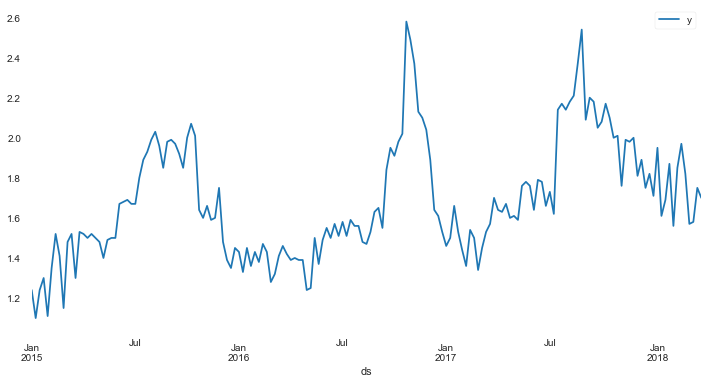

In [41]:
df_cali.plot(figsize=(12,6))

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
result = seasonal_decompose(df_cali, model='mul')
result

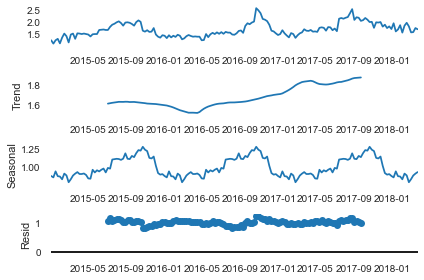

In [44]:
result.plot()
plt.show()

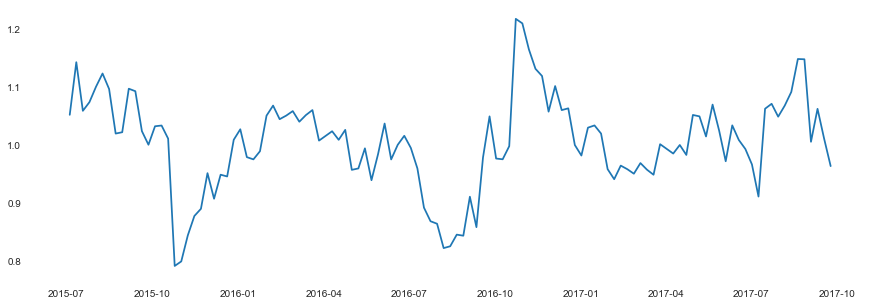

In [45]:
plt.figure(figsize=(15,5))
plt.plot(result.resid)
plt.show()

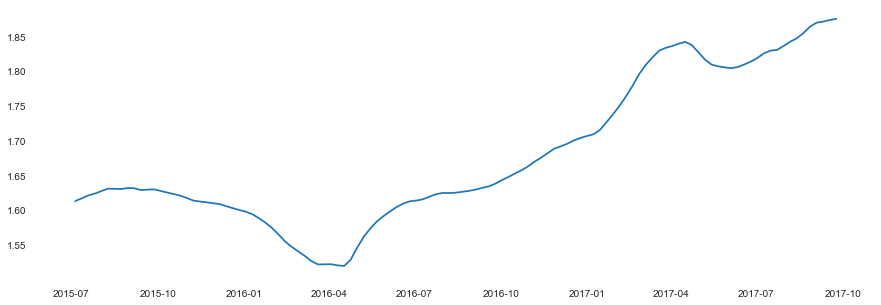

In [46]:
plt.figure(figsize=(15,5))
plt.plot(result.trend)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(result.seasonal)
plt.show()

- Trend: dữ liệu có xu hướng giảm đến tháng 04-2016 thì bắt đầu xuất hiện xu hướng tăng mạnh
- Seasonal: dữ liệu có tính seasonal khá rõ
- Resid: lỗi tương đối ổn đỉnh ở mức 0.9 đến 1.1,  thỉnh thoảng lỗi vượt ra 2 ngưỡng trên nhưng cũng chỉ ở mức 0.8 hoặc 1.2

In [47]:
stepwise_model = auto_arima(df_cali, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=52,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[52]             : AIC=-78.235, Time=69.00 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-50.107, Time=0.57 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=9.82 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=10.91 sec
 ARIMA(2,1,2)(0,1,1)[52]             : AIC=inf, Time=48.25 sec
 ARIMA(2,1,2)(1,1,0)[52]             : AIC=-78.698, Time=39.44 sec
 ARIMA(2,1,2)(0,1,0)[52]             : AIC=-50.804, Time=2.33 sec
 ARIMA(2,1,2)(2,1,0)[52]             : AIC=-78.327, Time=131.63 sec
 ARIMA(2,1,2)(2,1,1)[52]             : AIC=-76.327, Time=91.08 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=-78.212, Time=21.29 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=-78.893, Time=26.07 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=-49.079, Time=2.42 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=-82.203, Time=88.06 sec
 ARIMA(2,1,1)(2,1,1)[52]             : AIC=-80.203, Time=96.11 sec
 ARIMA(2,1,1)(1,1,1)[52]          

In [48]:
train = df_cali.loc['2015-01-04':'2017-07-30'] 
test = df_cali.loc['2017-08-06':] 

In [49]:
stepwise_model.fit(train)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [50]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [51]:
mean_absolute_error(test['y'], future_forecast)

0.15941431808843456

In [52]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
df_merge = test.join(future_forecast)
df_merge.tail()

y  Prediction
ds                         
2018-02-25 1.82        1.62
2018-03-04 1.57        1.68
2018-03-11 1.58        1.77
2018-03-18 1.75        1.82
2018-03-25 1.70        1.84

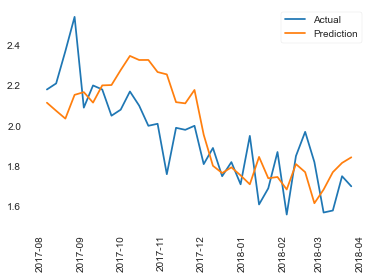

In [53]:
plt.plot(test, label='Actual')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

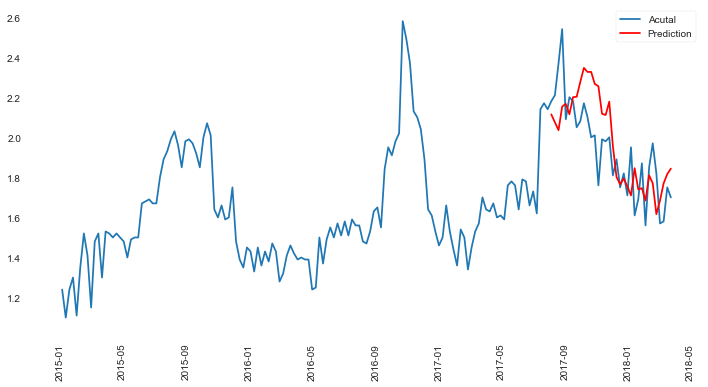

In [54]:
plt.figure(figsize=(12,6))
plt.plot(df_cali, label='Acutal')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [55]:
#next 26 weeks
future_forecast2 = stepwise_model.predict(n_periods=len(test)+26) 
future_forecast2

array([2.11437091, 2.07445053, 2.03560813, 2.15338311, 2.16683612,
       2.11494241, 2.20035302, 2.20202383, 2.2763834 , 2.34638001,
       2.32618782, 2.32639827, 2.26649456, 2.25484095, 2.11716815,
       2.11124517, 2.17764944, 1.95541832, 1.80172571, 1.76570681,
       1.79405786, 1.75415709, 1.70985798, 1.84578001, 1.73989853,
       1.74616745, 1.68429868, 1.81013161, 1.77011491, 1.61610935,
       1.68403374, 1.7700425 , 1.81599878, 1.84371156, 1.80177838,
       1.80381259, 1.81371633, 1.78585635, 1.69955642, 1.697597  ,
       1.9157243 , 1.84544744, 1.90970839, 1.89810694, 1.92770757,
       1.96585873, 1.88199238, 1.95197568, 1.86610612, 2.12119842,
       2.11509101, 2.10316738, 2.04483191, 2.02291133, 2.04353826,
       2.15061864, 2.168011  , 2.0871731 , 2.29567941, 2.36252886])

In [56]:
#next 26 weeks
future_forecast2[len(test):]

array([1.80177838, 1.80381259, 1.81371633, 1.78585635, 1.69955642,
       1.697597  , 1.9157243 , 1.84544744, 1.90970839, 1.89810694,
       1.92770757, 1.96585873, 1.88199238, 1.95197568, 1.86610612,
       2.12119842, 2.11509101, 2.10316738, 2.04483191, 2.02291133,
       2.04353826, 2.15061864, 2.168011  , 2.0871731 , 2.29567941,
       2.36252886])

In [57]:
import datetime
start_week = datetime.datetime.strptime("2018-04-01","%Y-%m-%d")
end_week = start_week + datetime.timedelta(weeks=25)
weeks = pd.date_range(start_week,end_week, freq='W').strftime("%Y-%m-%d").tolist() 

In [58]:
new_predict = pd.DataFrame({'ds' : weeks,
                            'y': future_forecast2[len(test):]})
new_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      26 non-null     object 
 1   y       26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


In [59]:
new_predict['ds'] = pd.to_datetime(new_predict['ds'])
new_predict.set_index('ds', inplace=True)

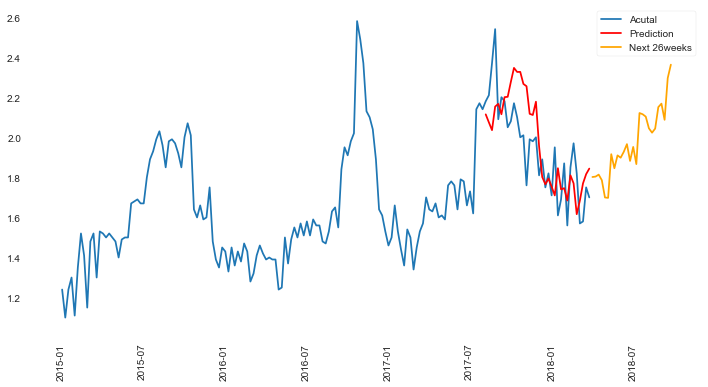

In [60]:
plt.figure(figsize=(12,6))
plt.plot(df_cali, label='Acutal')
plt.plot(future_forecast, label='Prediction', color='red')
plt.plot(new_predict, label='Next 26weeks', color='orange')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

#### Dùng Facebook Prophet

In [61]:
df_cali.head()

y
ds             
2015-01-04 1.24
2015-01-11 1.10
2015-01-18 1.24
2015-01-25 1.30
2015-02-01 1.11

In [62]:
df_cali.reset_index(inplace=True)

In [63]:
df_cali.head()

ds    y
0 2015-01-04 1.24
1 2015-01-11 1.10
2 2015-01-18 1.24
3 2015-01-25 1.30
4 2015-02-01 1.11

In [64]:
#chia dữ liệu 80-20
#tổng dữ liệu là 169 tuần => train 135 tuần test 34 tuần
train = df_cali.drop(df_cali.index[-34:])
train.tail()

ds    y
130 2017-07-02 1.73
131 2017-07-09 1.62
132 2017-07-16 2.14
133 2017-07-23 2.17
134 2017-07-30 2.14

In [65]:
test = df_cali.drop(df_cali.index[0:-34])
test.head()

ds    y
135 2017-08-06 2.18
136 2017-08-13 2.21
137 2017-08-20 2.37
138 2017-08-27 2.54
139 2017-09-03 2.09

In [66]:
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

In [67]:
model.fit(train)

In [68]:
#34 tuần test và 17 tuần dự đoán
import datetime
start_week = datetime.datetime.strptime("2017-08-06","%Y-%m-%d")
end_week = start_week + datetime.timedelta(weeks=51)
weeks = pd.date_range(start_week,end_week, freq='W').strftime("%Y-%m-%d").tolist()
future = pd.DataFrame(weeks)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [69]:
future.tail()

ds
47 2018-07-01
48 2018-07-08
49 2018-07-15
50 2018-07-22
51 2018-07-29

In [70]:
forecast = model.predict(future)

In [71]:
forecast[['ds','yhat']].head()

ds  yhat
0 2017-08-06  2.03
1 2017-08-13  1.98
2 2017-08-20  1.97
3 2017-08-27  2.00
4 2017-09-03  2.06

In [72]:
forecast[['ds','yhat']].tail()

ds  yhat
47 2018-07-01  2.04
48 2018-07-08  2.10
49 2018-07-15  2.20
50 2018-07-22  2.29
51 2018-07-29  2.32

In [73]:
df_cali.y.mean()

1.6852071005917157

In [74]:
test.y.mean()

1.9355882352941176

In [75]:
y_test = test['y'].values
y_pred = forecast['yhat'].values[:34]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae_p) 

MAE: 0.174


In [76]:
rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)

RMSE: 0.218


In [77]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

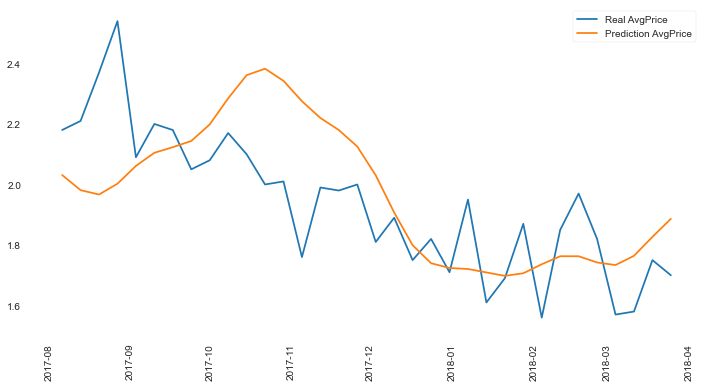

In [78]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real AvgPrice')
plt.plot(y_pred_value, label='Prediction AvgPrice')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

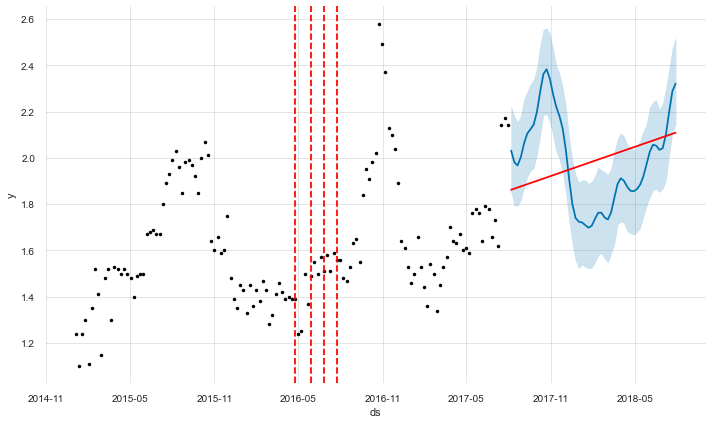

In [79]:
fig = model.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, forecast)

# Kết luận:

- MAE của ARIMA là 0.159, MAE của FB Prophet là 0.174, cả 2 thuật toán đều cho MAE trong khoảng 10% so với mean của dữ liệu => có thể dùng được 2 thuật toán trên cho bộ dữ liệu này
- ARIMA tốn rất nhiều thời gian hơn so với FB Prophet vì phải chạy auto_arima để tìm ra bộ thông số phù hợp
- Do sự chênh lệch về MAE không đáng kể, thời gian thực hiện của FB Prophet rất nhanh nên ta chọn FB Prophet để đự đoán giá theo seasonal

## Dự đoán 3 năm bằng FB Prophet

In [80]:
df_cali.head()

ds    y
0 2015-01-04 1.24
1 2015-01-11 1.10
2 2015-01-18 1.24
3 2015-01-25 1.30
4 2015-02-01 1.11

In [82]:
m = Prophet()
m.fit(df_cali)
future = m.make_future_dataframe(periods=52*3, freq='W')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
forecast = m.predict(future)

In [84]:
forecast.shape

(325, 16)

In [85]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          325 non-null    datetime64[ns]
 1   trend                       325 non-null    float64       
 2   yhat_lower                  325 non-null    float64       
 3   yhat_upper                  325 non-null    float64       
 4   trend_lower                 325 non-null    float64       
 5   trend_upper                 325 non-null    float64       
 6   additive_terms              325 non-null    float64       
 7   additive_terms_lower        325 non-null    float64       
 8   additive_terms_upper        325 non-null    float64       
 9   yearly                      325 non-null    float64       
 10  yearly_lower                325 non-null    float64       
 11  yearly_upper                325 non-null    float64       

In [86]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(26)

ds  yhat  yhat_lower  yhat_upper  trend  trend_lower  trend_upper
299 2020-09-27  2.77        2.53        2.98   2.51         2.42         2.60
300 2020-10-04  2.83        2.60        3.04   2.52         2.42         2.61
301 2020-10-11  2.88        2.66        3.09   2.52         2.42         2.61
302 2020-10-18  2.89        2.66        3.11   2.53         2.43         2.62
303 2020-10-25  2.86        2.63        3.07   2.53         2.43         2.62
304 2020-11-01  2.80        2.57        3.00   2.53         2.43         2.63
305 2020-11-08  2.75        2.52        2.98   2.54         2.44         2.63
306 2020-11-15  2.73        2.50        2.97   2.54         2.44         2.64
307 2020-11-22  2.71        2.48        2.93   2.55         2.44         2.64
308 2020-11-29  2.66        2.42        2.88   2.55         2.44         2.65
309 2020-12-06  2.56        2.33        2.77   2.55         2.45         2.65
310 2020-12-13  2.45        2.23        2.67   2.56         2.45         2.66
311 2020-12-20  2.38        2.16        2.60   2.56         2.45         2.66
312 2020-12-27  2.36        2.13        2.58   2.57         2.46         2.67
313 2021-01-03  2.36        2.15        2.59   2.57         2.46         2.67
314 2021-01-10  2.35        2.12        2.59   2.57         2.46         2.68
315 2021-01-17  2.32        2.10        2.55   2.58         2.46         2.68
316 2021-01-24  2.31        2.08        2.53   2.58         2.47         2.69
317 2021-01-31  2.33        2.11        2.56   2.59         2.47         2.69
318 2021-02-07  2.38        2.14        2.59   2.59         2.47         2.70
319 2021-02-14  2.41        2.16        2.62   2.60         2.48         2.70
320 2021-02-21  2.39        2.15        2.61   2.60         2.48         2.71
321 2021-02-28  2.35        2.10        2.57   2.60         2.48         2.71
322 2021-03-07  2.32        2.08        2.54   2.61         2.49         2.72
323 2021-03-14  2.36        2.10        2.59   2.61         2.49         2.72
324 2021-03-21  2.43        2.19        2.65   2.62         2.49         2.73

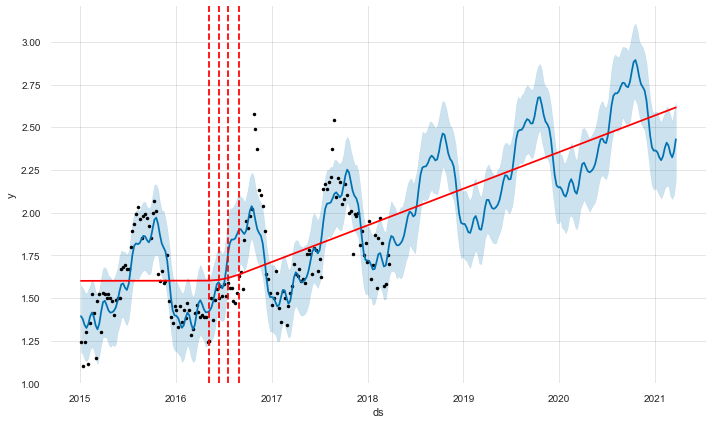

In [87]:
fig = m.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), m, forecast)

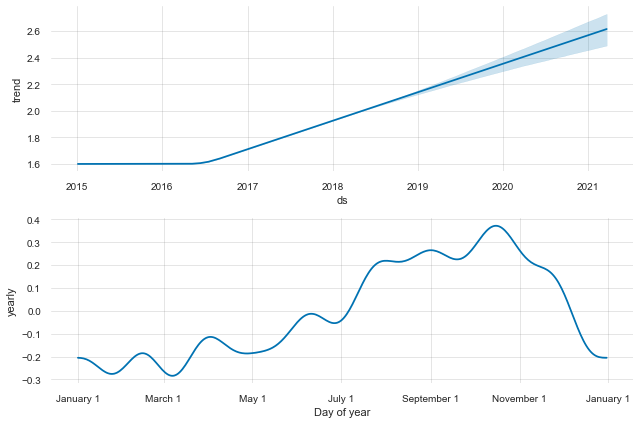

In [88]:
fig1 = m.plot_components(forecast)
fig1.show()

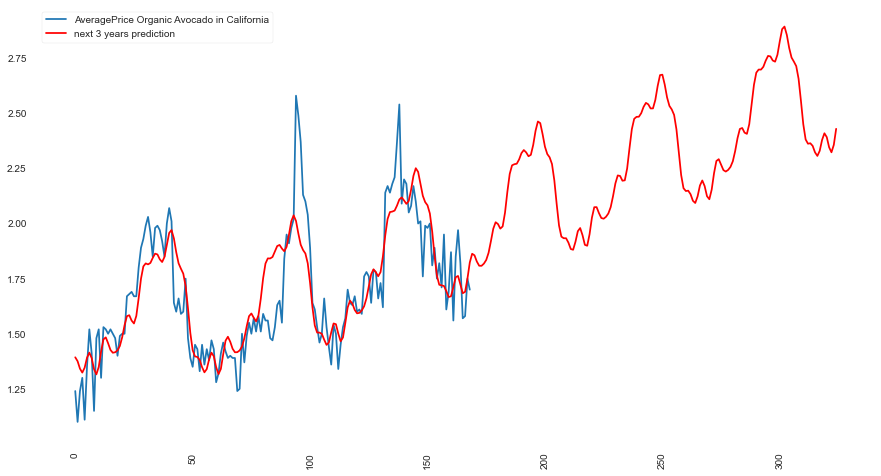

In [89]:
plt.figure(figsize=(15,8))
plt.plot(df_cali['y'], label='AveragePrice Organic Avocado in California')
plt.plot(forecast['yhat'], label='next 3 years prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Kết quả dự đoán cho thấy xu hướng tăng của Average Price đối với loại Organic tại California trong 3 năm tới => có thể mở rộng việc kinh doanh bơ Organic tại California